# NEU

In [6]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import self_driving_car
from self_driving_car import data_generator
from self_driving_car import model as SDCModel
from imp import reload
%matplotlib inline
reload(self_driving_car)
reload(self_driving_car.data_generator)
reload(self_driving_car.model)
print('reloaded')
MODEL = "commaAI"

reloaded


# Training Episode 1 (all in)

shuffled data
split data into 32210 training sample and 7993 validation samples
8595 samples removed due to speed < 10.000000
39604 samples randomly removed due to steering < 0.080000
41547 samples randomly removed due to steering < 0.010000
steering angle corrected by +/- 0.180000
Number of samples:            111269
Number of active sample:      75716
Number of training samples:   71292
Number of validation samples: 4424


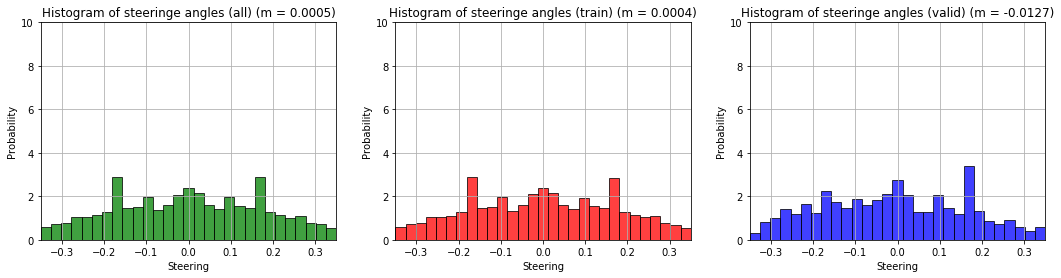

loading images to ram...
all images loaded to ram


In [3]:
datagen = self_driving_car.data_generator.DataGenerator()
datagen.add_dataset("dataset1_udacity")
datagen.add_dataset("dataset4_beta_sim")
datagen.add_dataset("dataset5_beta_backwards")
datagen.add_dataset("dataset6_curve2A")
datagen.add_dataset("dataset7_curve2B")
datagen.shuffle()
datagen.split(valid_size=0.2)
datagen.activate_mod('mod_flip')
datagen.activate_mod('mod_lighting')
datagen.activate_mod('mod_blur')
datagen.filter_data_not_moving()
datagen.filter_data_low_steering(low_steering_threshold = 0.08, low_steering_remove_prop = 0.30)
datagen.filter_data_low_steering(low_steering_threshold = 0.01, low_steering_remove_prop = 0.80)
datagen.correct_camera_steering(0.18)
datagen.plot_stats()
datagen.load_img_to_ram()

In [7]:
model = SDCModel.SDRegressionModel(MODEL)
#model.load_weights("20170213_A", 1) # <<<<<<<<<
model.train_generator(datagen, "20170213_A", nb_epoch = 6)
model.plot_history();

Instructions for updating:
Please switch to tf.summary.merge_all.
Epoch 1/6
71168/71292 [============================>.] - ETA: 1s - loss: 0.0667   

/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/keras/engine/training.py:1537: UserWarning: Epoch comprised more than `samples_per_epoch` samples, which might affect learning results. Set `samples_per_epoch` correctly to avoid this warning.
  warnings.warn('Epoch comprised more than '


Epoch 00000: saving model to /mnt/models//commaAI/weights/20170213_A/weights.00-0.0150.hdf5
71296/71292 [==============================] - 662s - loss: 0.0666 - val_loss: 0.0150
Epoch 2/6
71296/71292 [==============================] - 658s - loss: 0.0160 - val_loss: 0.0126
Epoch 3/6
71296/71292 [==============================] - 657s - loss: 0.0129 - val_loss: 0.0115
Epoch 4/6
  640/71292 [..............................] - ETA: 428s - loss: 0.0131

KeyboardInterrupt: 

In [ ]:
datagen.normalizer = model.normalizer
vdata = datagen.get_valid_data()
print(vdata[0].shape)
s_pred = model.model.predict(vdata[0], batch_size=128)
print(s_pred.shape)

plt.figure(figsize=(18,4))
plt.plot(s_pred[:500:2]) # blau
plt.plot(vdata[1][:500:2]) # orange
plt.show()

In [ ]:
plt.figure(figsize=(18,18))
for i in range(6*6):
    idx = np.random.randint(vdata[0].shape[0]);
    img = vdata[0][idx,:,:,:];
    plt.subplot(6,6,i+1)
    plt.text(10,25,'s:%.2f (%.2f)' % (s_pred[idx], vdata[1][idx]), color='w', fontsize=13, backgroundcolor='k')
    plt.imshow(SDCModel.SDRegressionModel.denormalize(img))
plt.show()

In [ ]:
gen = datagen.get_batch_generator()
tdata = next(gen)
s2_pred = model.model.predict(tdata[0], batch_size=192)
plt.figure()
plt.plot(s2_pred[::2])  # blau
plt.plot(tdata[1][::2]) # orange
plt.show()

In [ ]:
plt.figure(figsize=(18,18))
for i in range(6*6):
    idx = i;
    img = tdata[0][idx,:,:,:];
    plt.subplot(6,6,i+1)
    plt.text(10,25,'s:%.2f (%.2f)' % (s2_pred[idx], tdata[1][idx]), color='w', fontsize=13, backgroundcolor='k')
    plt.imshow(SDCModel.SDRegressionModel.denormalize(img))
plt.show()

In [ ]:
datagen.data[np.logical_and(datagen.data.is_train, datagen.data.is_active)]